In [ ]:
!unzip Alzheimers.zip -d/content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/Combined Dataset/train/No Impairment/NoImpairment (1106).jpg  
  inflating: /content/Combined Dataset/train/No Impairment/NoImpairment (1107).jpg  
  inflating: /content/Combined Dataset/train/No Impairment/NoImpairment (1108).jpg  
  inflating: /content/Combined Dataset/train/No Impairment/NoImpairment (1109).jpg  
  inflating: /content/Combined Dataset/train/No Impairment/NoImpairment (111).jpg  
  inflating: /content/Combined Dataset/train/No Impairment/NoImpairment (1110).jpg  
  inflating: /content/Combined Dataset/train/No Impairment/NoImpairment (1111).jpg  
  inflating: /content/Combined Dataset/train/No Impairment/NoImpairment (1112).jpg  
  inflating: /content/Combined Dataset/train/No Impairment/NoImpairment (1113).jpg  
  inflating: /content/Combined Dataset/train/No Impairment/NoImpairment (1114).jpg  
  inflating: /content/Combined Dataset/train/No Impairment/NoImpairment (1115).jpg  
  inflating: /c

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = "/content/Combined Dataset/train"
test_dir = "/content/Combined Dataset/test"

In [ ]:
img_size = (128, 128)
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 10240 images belonging to 4 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1279 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

In [ ]:
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(128,128,3))
base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 77s 184ms/step - accuracy: 0.4328 - loss: 1.2451 - val_accuracy: 0.5113 - val_loss: 1.0367
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 46s 144ms/step - accuracy: 0.6221 - loss: 0.8504 - val_accuracy: 0.5340 - val_loss: 0.9657
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 45s 140ms/step - accuracy: 0.6337 - loss: 0.8240 - val_accuracy: 0.5418 - val_loss: 0.9325
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 44s 139ms/step - accuracy: 0.6398 - loss: 0.7999 - val_accuracy: 0.5270 - val_loss: 0.9755
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 46s 145ms/step - accuracy: 0.6521 - loss: 0.7712 - val_accuracy: 0.5199 - val_loss: 0.9665
Epoch 7/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 46s 145ms/step - accuracy: 0.6454 - loss: 0.7753 - val_accuracy: 0.5215 - val_loss: 0.9833
Epoch 8/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 46s 145ms/step - accuracy: 0.6641 - loss: 0.7531 - val_accuracy: 0.5668 - val_loss: 0.8809
Epoch 9/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 45s 140ms/step - accuracy: 0.6765 - loss: 0

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6136 - loss: 0.9077
Test accuracy : 54.261142%


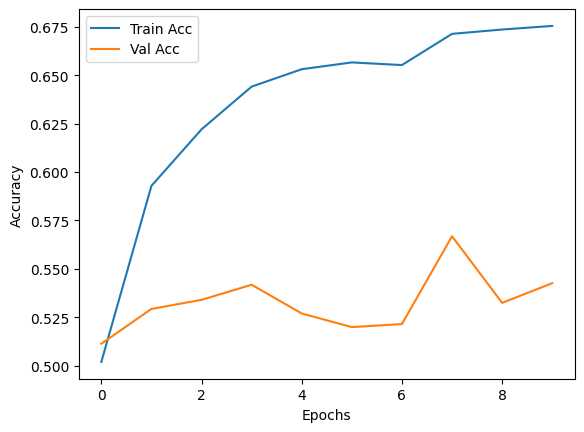

In [ ]:
loss, acc = model.evaluate(test_generator)
print(f"Test accuracy : {acc*100:2f}%")

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:30]:
  layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history_finetune = model.fit(
     train_generator,
     epochs=5,
     validation_data=test_generator
 )

Epoch 1/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 96s 176ms/step - accuracy: 0.4739 - loss: 1.6362 - val_accuracy: 0.2846 - val_loss: 2.9112
Epoch 2/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 49s 154ms/step - accuracy: 0.6101 - loss: 1.0462 - val_accuracy: 0.1900 - val_loss: 4.9232
Epoch 3/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 49s 153ms/step - accuracy: 0.6526 - loss: 0.8551 - val_accuracy: 0.2213 - val_loss: 4.7882
Epoch 4/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 49s 153ms/step - accuracy: 0.6859 - loss: 0.7406 - val_accuracy: 0.4073 - val_loss: 2.0708
Epoch 5/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 49s 153ms/step - accuracy: 0.6869 - loss: 0.6996 - val_accuracy: 0.4785 - val_loss: 1.2756


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
img_path = '/content/sample.png'

img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [ ]:
pred = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


In [ ]:
class_labels = list(train_generator.class_indices.keys())
predicted_class = class_labels[np.argmax(pred)]

In [ ]:
print("Predicted Class:", predicted_class)

Predicted Class: Very Mild Impairment


In [ ]:
img2_path = '/content/download.jpg'

img2 = image.load_img(img2_path, target_size=(128,128))
img2_array = image.img_to_array(img2) / 255.0
img2_array = np.expand_dims(img2_array, axis=0)

In [ ]:
pred = model.predict(img2_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [ ]:
class_labels2 = list(train_generator.class_indices.keys())
predicted_class2 = class_labels[np.argmax(pred)]

In [ ]:
print("Predicted Class:", predicted_class2)

Predicted Class: Very Mild Impairment


In [ ]:
img3_path = '/content/ff.jpg'

img3 = image.load_img(img3_path, target_size=(128,128))
img3_array = image.img_to_array(img3) / 255.0
img3_array = np.expand_dims(img3_array, axis=0)

In [ ]:
pred3 = model.predict(img3_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [ ]:
class_labels = list(train_generator.class_indices.keys())
predicted_class3 = class_labels[np.argmax(pred3)]

In [ ]:
print("Predicted Class for img3:", predicted_class3)

Predicted Class for img3: No Impairment
